In [1]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
%matplotlib inline

#### (a)


In [20]:

def PageRank(G, alpha):
    R = len(G)
    P = np.zeros((R, R))
    dt = np.zeros((1, R))
    for i in range(R):
        n = 0
        for j in range(R):
            # going down column wise
            if (G[j][i] != 0):
                n += 1
            
        dt[0][i] = 1 if n == 0 else 0
        
        for j in range(R):
            if (G[j][i] != 0):
                P[j][i] = 1 / n
                

    it = 1
    cur_prob_matrix = np.ones((R, 1))
    cur_prob_matrix *= 1/R
    eet = np.ones((R, R))
    e = np.ones((R, 1))
    edt = np.matmul(e, dt)
    M = alpha * (P + edt / R) + (1 - alpha) / R * eet
    # print(M)
    # print(dt)
    while (True):
        next_prob_matrix = np.matmul(M, cur_prob_matrix)
        # print(cur_prob_matrix)
        # print(next_prob_matrix)
        diff = 0
        for i in range(R):
            cur_diff = np.abs(next_prob_matrix[i][0] - cur_prob_matrix[i][0])
            # print(cur_diff)
            diff = np.maximum(cur_diff, diff)
            
        if (diff < 10 ** -8):
            break;
        else:
            it += 1
            cur_prob_matrix = next_prob_matrix
    
    # print(it)
    return [cur_prob_matrix, it]
        
            

#### (b)

In [3]:
#    [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14]
G = [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #1
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #2
     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #3
     [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], #4
     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], #5
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #6
     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #7
     [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], #8
     [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], #9
     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #10
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #11
     [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], #12
     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1], #13
     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]] #14

# 12 is a dead end

result = PageRank(G, 0.9)
importance = np.zeros((len(G), 2))

for i in range(len(G)):
    importance[i] = [i+1, result[0][i][0]]
    
print("final vector of pagerank scores, in ascending order of node numbers\n", importance)
hassort = sorted(importance, key=lambda x: x[1], reverse = True)
# print(np.sum(importance[:, 1]))

print("page indices in descending order of importance")
for i in range(len(hassort)):
    print(hassort[i][0])


[[0.00714286 0.45714286 0.00714286 0.00714286 0.00714286 0.00714286
  0.00714286 0.00714286 0.00714286 0.00714286 0.00714286 0.07142857
  0.00714286 0.00714286]
 [0.00714286 0.00714286 0.00714286 0.00714286 0.00714286 0.00714286
  0.30714286 0.00714286 0.00714286 0.00714286 0.00714286 0.07142857
  0.00714286 0.00714286]
 [0.90714286 0.45714286 0.00714286 0.00714286 0.00714286 0.00714286
  0.00714286 0.00714286 0.00714286 0.00714286 0.00714286 0.07142857
  0.00714286 0.00714286]
 [0.00714286 0.00714286 0.00714286 0.00714286 0.90714286 0.30714286
  0.00714286 0.00714286 0.00714286 0.00714286 0.00714286 0.07142857
  0.00714286 0.00714286]
 [0.00714286 0.00714286 0.00714286 0.00714286 0.00714286 0.30714286
  0.00714286 0.00714286 0.00714286 0.00714286 0.00714286 0.07142857
  0.00714286 0.00714286]
 [0.00714286 0.00714286 0.00714286 0.00714286 0.00714286 0.00714286
  0.00714286 0.00714286 0.00714286 0.30714286 0.00714286 0.07142857
  0.00714286 0.00714286]
 [0.00714286 0.00714286 0.45714286

Text(0.5, 1.0, 'sparsity pattern of adjacency matrix G')

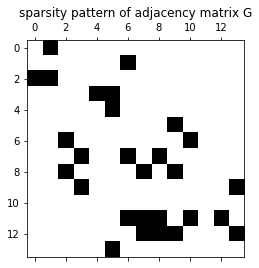

In [4]:
# plt.subplots(1, 2)
# sparsity pattern of adjacency matrix G
plt.spy(G)
plt.title("sparsity pattern of adjacency matrix G")



Text(0.5, 1.0, 'pagerank scores by page indices')

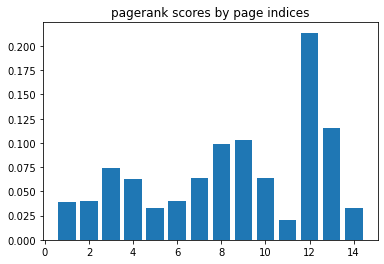

In [5]:

# pagreank scores
plt.bar(importance[:, 0], importance[:, 1])
plt.title("pagerank scores by page indices")

#### (c)

In [6]:

def PageRankSparse(Gcsr, alpha):
    R = Gcsr.get_shape()[0]
    # print("R: ", R)
    # print(Gcsr)
    P = Gcsr.copy()
    P = P / R
    dT = csr_matrix((1, R)).toarray()
    for i in range(R):
        col = Gcsr.getcol(i)
        n = col.count_nonzero()
        # print(col)
        # print(n)
        if(n > 0):
            P[:, i] = col / n
        dT[0][i] = 1 if n == 0 else 0
    
    temp1 = np.ones((R, 1))
    temp2 = np.ones((1, R))
    e = csr_matrix(temp1, shape = (R, 1)).toarray()
    eT = csr_matrix(temp2, shape = (1, R)).toarray()
    p_cur = e / R
    it = 1
    
    while (True):
        a = alpha * P.dot(p_cur)
        b = alpha / R * e.dot(dT).dot(p_cur)
        c = (1-alpha) / R * e.dot(eT).dot(p_cur)
        p_next = a + b + c
        # print(p_cur)
        # print(p_next)
        diff = 0
        for i in range(R):
            cur_diff = np.abs(p_next[i][0] - p_cur[i][0])
            # print(cur_diff)
            diff = np.maximum(cur_diff, diff)
            
        if (diff <= 10 ** -8):
            break;
        else:
            it += 1
            p_cur = p_next
    
    return [p_cur, it]
    
    

#### (d)

Text(0.5, 1.0, 'sparsity pattern of sparse adjacency matrix Gcsr')

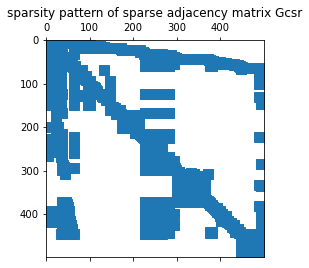

In [7]:
# Gcsr = csr_matrix(G)
# print(PageRankSparse(Gcsr, 0.9))


import scipy.io
data = scipy.io.loadmat('bbc.mat')
Gcsr = data['G']
Gcsr = Gcsr.transpose() #data uses the reverse adjacency matrix convention.
U = data['U']
plt.spy(Gcsr)
plt.title("sparsity pattern of sparse adjacency matrix Gcsr")

In [29]:
result = PageRankSparse(Gcsr, 0.9)
R = Gcsr.get_shape()[0]
importance = np.full((R, 2), 0, dtype=object)
# print(importance)
# print(U)
# print(result[0])

for i in range(R):
    link = U[i][0][0]
    prob = result[0][i][0]
    importance[i] = [link, prob]
    
# print(importance)
# print("final vector of pagerank scores, in ascending order of node numbers\n", importance)
hassort = sorted(importance, key=lambda x: x[1], reverse = True)
# print(np.sum(importance[:, 1]))

print("first 20 page indices in descending order of importance")
# for i in range(20):
#     print(hassort[i][0])

indices = (-importance[:, 1]).argsort()[:20]
for i in range(len(indices)):
    print(U[indices[i]][0][0])
# print(indices)



first 20 page indices in descending order of importance
http://www.bbc.com
https://www.bbc.com/news
https://www.bbc.co.uk/news
http://www.bbcamerica.com
http://www.bbc.com/future/story/20181024-the-best-age-to-learn-a-foreign-language
http://www.bbc.com/future/story/20181026-how-one-sided-objects-like-a-mobius-strip-work
https://www.bbcgoodfood.com
https://www.bbc.com/news/business-45939984
https://www.bbc.com/news/education-45979234
https://www.bbc.com/news/uk-politics-45948282
https://www.bbc.com/news/business-45961761
http://www.bbc.com/travel/columns/to-the-ends-of-the-earth
http://www.bbc.com/travel
http://www.bbc.com/travel/columns/culinary-roots
http://www.bbc.com/travel/columns/welcome-to-our-house
http://bbc.in/2s4bidh
http://www.bbc.com/travel/columns/travel-journeys
http://bbc.in/2rAX81O
https://www.bbc.com/news/world-latin-america-45944164
https://www.bbc.com/news/world-europe-45902014
